In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'D:/IBM_PROJECT/Climate_Actions_AI/data/raw/GlobalLandTemperaturesByState.csv'  
df = pd.read_csv(file_path)

In [3]:
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645675 entries, 0 to 645674
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             645675 non-null  object 
 1   AverageTemperature             620027 non-null  float64
 2   AverageTemperatureUncertainty  620027 non-null  float64
 3   State                          645675 non-null  object 
 4   Country                        645675 non-null  object 
dtypes: float64(2), object(3)
memory usage: 24.6+ MB
None
       AverageTemperature  AverageTemperatureUncertainty
count       620027.000000                  620027.000000
mean             8.993111                       1.287647
std             13.772150                       1.360392
min            -45.389000                       0.036000
25%             -0.693000                       0.316000
50%             11.199000                       0.656000
75%   

In [4]:
df['dt'] = pd.to_datetime(df['dt'])

In [5]:
df['Year'] = df['dt'].dt.year
df['Month'] = df['dt'].dt.month

In [6]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
Year                                 0
Month                                0
dtype: int64


In [7]:
df_clean = df.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])


In [8]:
df_clean = df_clean.drop_duplicates()

In [9]:
df_clean = df_clean[df_clean['Year'] >= 1900]

In [10]:
temp_by_year = df_clean.groupby('Year')['AverageTemperature'].mean()

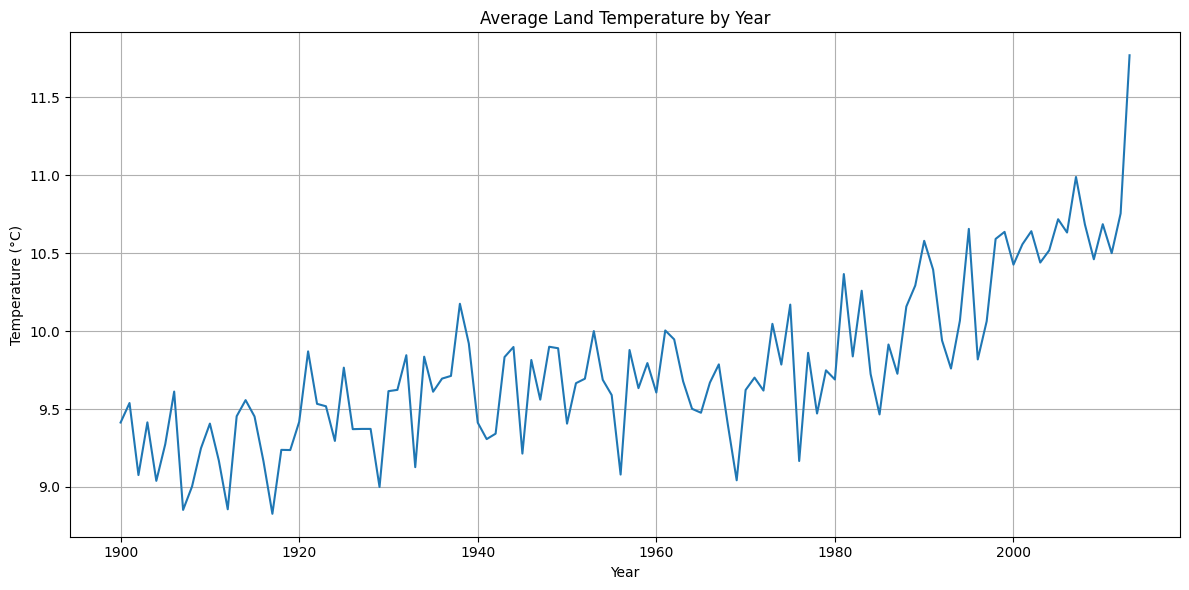

In [11]:
plt.figure(figsize=(12, 6))
temp_by_year.plot()
plt.title("Average Land Temperature by Year")
plt.ylabel("Temperature (°C)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
state_avg_temp = df_clean.groupby('State')['AverageTemperature'].mean().sort_values(ascending=False).head(10)

C:\Users\Prerana V\AppData\Local\Temp\ipykernel_24852\2966869543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg_temp.values, y=state_avg_temp.index, palette='magma')


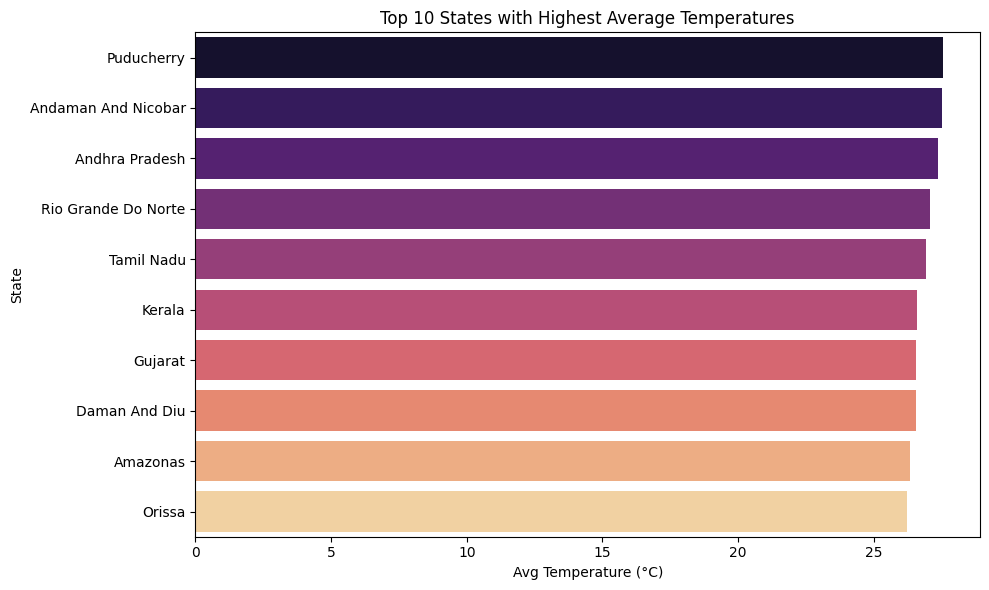

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=state_avg_temp.values, y=state_avg_temp.index, palette='magma')
plt.title("Top 10 States with Highest Average Temperatures")
plt.xlabel("Avg Temperature (°C)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

In [14]:
output_path = 'cleaned_GlobalLandTemperaturesByState.csv'
df_clean.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")

Cleaned dataset saved to: cleaned_GlobalLandTemperaturesByState.csv
